# Задание 9

Методом прогонки решить разностный аналог граничной задачи для уравнения y`` = sin (x) на промежутке 0 < x < π. Рассмотреть различные варианты граничных условий.

## Аналитическое решение

$$\left\{\begin{matrix}
{y}'' = sin(x)\\ 
y(0) = \mu_1\\ 
y(\pi ) = \mu_2
\end{matrix}\right.$$

$$=>\;\;y(x) = \mu_1 + \frac{\mu_2  - \mu_1 }{\pi }x - sin(x)$$

$$\left\{\begin{matrix}
{y}'' = sin(x)\\ 
y(0) = \mu_1\\ 
y'(\pi ) = \mu_2
\end{matrix}\right.$$

$$=>\;\;y(x) = \mu_1 + (\mu_2  - 1)x - sin(x)$$

## Решение методом прогонки тридиагональной матрицы

**Граничные условия:**

$$\left\{\begin{matrix}
y_0 = \mu_1\\
y_N = \mu_2
\end{matrix}\right. \;\;\;\; либо \;\;\;\;\left\{\begin{matrix}
{y_0}' = \mu_1\\
{y_N}' = \mu_2
\end{matrix}\right.$$

Пердставим второе устловие в следующем виде:
$$\left\{\begin{matrix}
\frac{y_1-y_0}{h} = \mu1\\
\frac{y_N-y_{N-1}}{h} = \mu2
\end{matrix}\right. \;\;\;\; или \;\;\;\; 
\left\{\begin{matrix}
y_0 = y_1 - h\mu1\\
y_N = y_{N-1} + h\mu2
\end{matrix}\right.$$
Тогда в общем виде:
## $$\left\{\begin{matrix}
y_0 = \lambda_1y_1 + \mu1\\
y_N = \lambda_2y_{N-1} + \mu2
\end{matrix}\right.$$

**Краевая задача:**
$$\left\{\begin{matrix}
a_i y_{i-1} + b_i y_i + c_i y_{i+1} = f_i \\ 
y_0 = \lambda_1y_1 + \mu1\\ 
y_N = \lambda_2y_{N-1} + \mu2
\end{matrix}\right. $$ 

$$A = \begin{vmatrix}
1 & -\lambda_1 & 0 & ... & 0 & 0 & 0 & ... & 0 & 0 & 0\\ 
a_1 & b_1 & c_1 & ... & 0 & 0 & 0 & ... & 0 & 0 & 0\\ 
... & ... & ... & ... & ... & ... & ... & ... & ... & ... & ...\\ 
0 & 0 & 0 & ... & a_i & b_i & c_i & ... & 0 & 0 & 0\\ 
... & ... & ... & ... & ... & ... & ... & ... & ... & ... & ...\\ 
0 & 0 & 0 & ... & 0 & 0 & 0 & ... & a_{N-1} & b_{N-1} & c_{N-1}\\ 
0 & 0 & 0 & ... & 0 & 0 & 0 & ... & 0 & -\lambda_2 & 1
\end{vmatrix}$$

$$Ay = f, y =(y_0, y_1,...,y_N), f = (\mu_1, f_1,...,f_{N-1}, \mu_2) $$

Пусть: $$y_i = \alpha_{i+1}y_{i+1}+\beta_{i+1}$$
Тогда: $$y_{i-1} = \alpha_i y_i + \beta_i$$
Подставим в краевую задачу и получим: $$ a_i(\alpha_i y_i + \beta_i) + b_i y_i +c_i y_{i+1} = f_i$$
Или: $$y_i = -\frac{c_i}{a_i\alpha_i + b_i}y_{i+1} + \frac{f_i - a_i\beta_i}{a_i\alpha_i + b_i}$$
**Получаем:**
## $$ \alpha_{i+1}=-\frac{c_i}{a_i\alpha_i + b_i} \;\;\;\; \beta_{i+1} = \frac{f_i - a_i\beta_i}{a_i\alpha_i + b_i}$$ 
## $$\alpha_1 = \lambda_1, \;\;\; \beta_1 = \mu_1$$
## $$y_N =\frac{\lambda_2\beta_N + \mu_2}{1-\alpha_N\lambda_2}, \;\;\; y_i = \alpha_{i+1}y_{i+1}+\beta_{i+1}$$


### Решим задачу из условия

$$\left\{\begin{matrix}
{y}'' = f(x)\\ 
y(0) = \mu_1\\ 
y(\pi ) = \mu_2
\end{matrix}\right. => \left\{\begin{matrix}
\frac{y_{i-1} -2y_i + y_{i+1}}{h^2} = f_i \\ 
y_0 = \lambda_1y_1 + \mu1\\
y_N = \lambda_2y_{N-1} + \mu2
\end{matrix}\right. $$ 

$$\bar{a} = [0, 1, 1, ... 1]$$
$$\bar{b} = [-2, -2, ... -2]$$
$$\bar{c} = [1, 1, ... 1, 0]$$
$$\bar{d} = [h^2f_0, ... h^2f_n]$$

In [1]:
from math import sin, pi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return sin(x)

In [3]:
def Analytical(x):
    if lambda2 == 1:
        return -sin(x)+(mu2-1)*x + mu1
    return -sin(x)+(mu2-mu1)/pi*x + mu1

In [4]:
def TDMA(a, b, c, d, N):
    alpha = np.zeros(N+1)
    beta = np.zeros(N+1)
    beta[1] = mu1
    alpha[1]  = lambda1
    for i in range(1, N):
        alpha[i+1] = (-c[i] / (b[i] + alpha[i] * a[i]))
        beta[i+1] = (d[i] - a[i] * beta[i]) / (b[i] + alpha[i] * a[i])
    y = np.zeros(N+1)
    y[N] = (mu2 + lambda2*beta[N])/(1 - alpha[N]*lambda2)
    for i in range (N-1, -1, -1):
        y[i] = alpha[i+1] * y[i+1] + beta[i+1]
    return y

## Инициализация

In [5]:
N = 1000
x1 = 0
x2 = pi
h = (x2-x1) / (N)

In [12]:
lambda1 = 0
lambda2 = 0
mu1 = 5
mu2 = 0

In [13]:
a = np.ones(N+1)
b = np.full(N+1, -2)
c = np.ones(N+1)
a[0] = 0
c[N] = 0

x =[]
d = []
ya = []

for i in range (0, N+1):
    x.append(x1+h*i)
    d.append(h*h*f(x[i]))
    ya.append(Analytical(x[i]))

d[0] = mu1
d[N] = mu2 

In [14]:
y = TDMA(a, b, c, d, N)

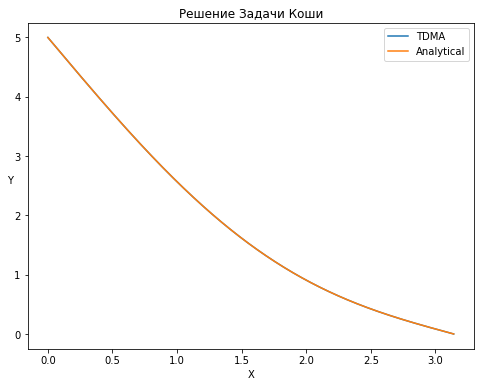

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='TDMA')
plt.plot(x, ya, label='Analytical')
plt.title('Решение Задачи Коши')
plt.ylabel('Y', rotation=0)
plt.xlabel('X')
plt.legend()

## График ошибки

In [16]:
error = [abs(y[i] - ya[i]) for i in range(0, N+1)]

Text(0.5, 0, 'X')

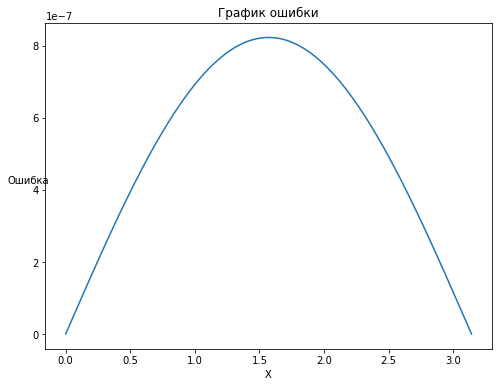

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(x, error)
plt.title('График ошибки')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('X')